# INTRODUCTION


Long short term memory (LSTM) is a model that increases the memory of recurrent neural networks. Recurrent neural networks hold short term memory in that they allow earlier determining information to be employed in the current neural networks. For immediate tasks, the earlier data is used. We may not possess a list of all of the earlier information for the neural node. In RNNs, LSTMs are very widely used in Neural networks. Their effectiveness should be implemented to multiple sequence modelling problems in many application domains like video, NLP, geospatial, and time-series.
One of the main issues with RNN is the vanishing gradient problem, and it emerges due to the repeated use of the same parameters, in RNN blocks, at each step. We must try to use different parameters to overcome this problem at each time step.
We try to find a balance in such a situation. We bring novel parameters at each step while generalizing variable-length sequences and keeping the overall amount of learnable parameters constant. We introduce gated RNN cells like LSTM and GRU.
Gated cells hold internal variables, which are Gates. This value of each gate at each time step depends on the information at that time step, including early states. The value of the gate then becomes multiplied by the different variables of interest to influence them. Time-series data is a series of data values gathered over time interims, allowing us to trace differences over time. Time-series data can trace progress over milliseconds, days, and years.
Early, our perspective of time-series data meant more static; the everyday highs and lows under temperature, the opening and closing amount of the stock market. Now we will go to the coding part. We will implement LSTM on the stocks dataset.

## IMPORTING IMPORTANT LIBRARIES

In [ ]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import math
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# DATASET

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/dhhruv/Stock-Price-Prediction/master/NSE-Tata_Global_Beverages_Limited.csv')


In [4]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


# DATA PREPROCESSING

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [11]:
selected_data = data[['Date', 'Open', 'Close','High','Low']]
print(selected_data)

            Date    Open   Close    High     Low
0     2018-10-08  208.00  215.15  222.25  206.85
1     2018-10-05  217.00  209.20  218.60  205.90
2     2018-10-04  223.50  218.20  227.80  216.15
3     2018-10-03  230.00  227.60  237.50  225.75
4     2018-10-01  234.55  230.90  234.60  221.05
...          ...     ...     ...     ...     ...
1230  2013-10-14  160.85  159.45  161.45  157.70
1231  2013-10-11  161.15  160.05  163.45  159.00
1232  2013-10-10  156.00  160.15  160.80  155.85
1233  2013-10-09  155.70  155.55  158.20  154.15
1234  2013-10-08  157.00  155.80  157.80  155.20

[1235 rows x 5 columns]


In [6]:
dataset_train=data.iloc[0:930,1:2]
dataset_test=data.iloc[930:,1:2]

In [7]:
training_set = data.iloc[0:930, 3:4].values
testing_set=data.iloc[930:,3:4].values

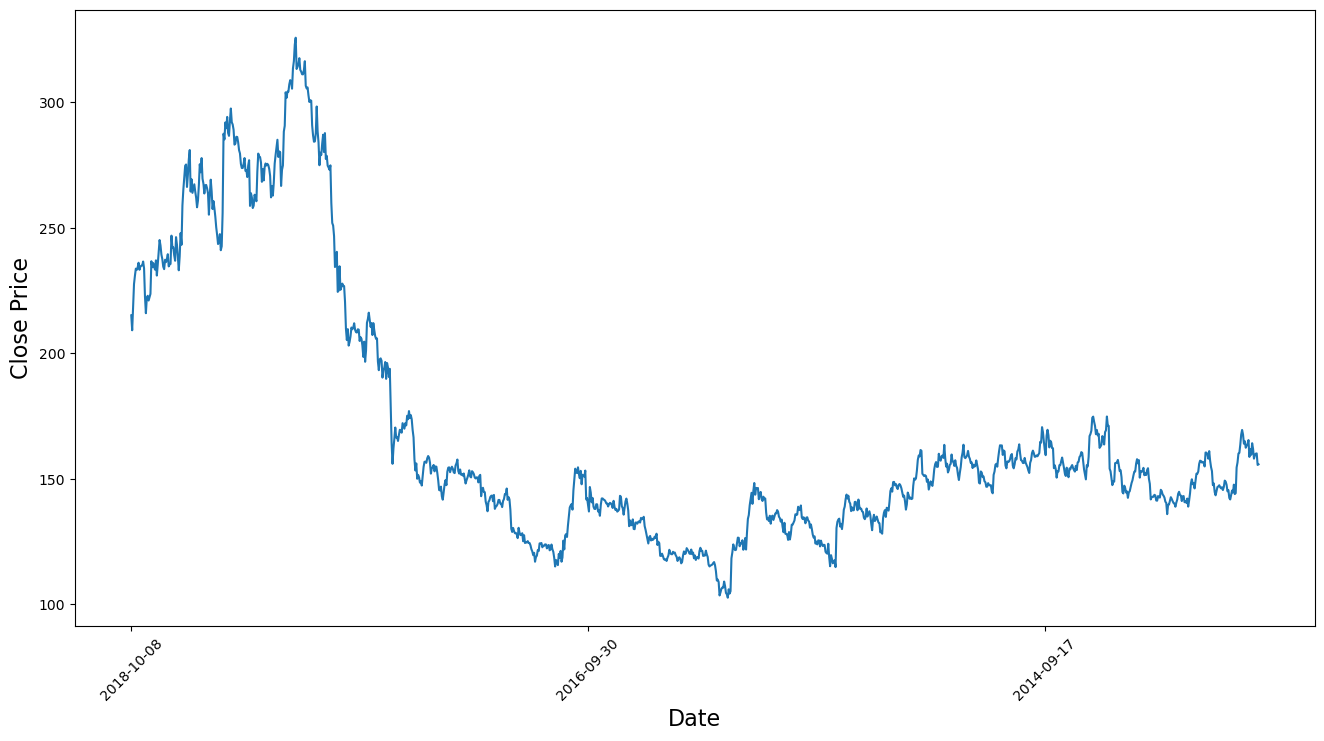

In [12]:
plt.figure(figsize = (16,8))
plt.plot(range(data.shape[0]),(data['Close']))
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Close Price',fontsize=16)
plt.show()

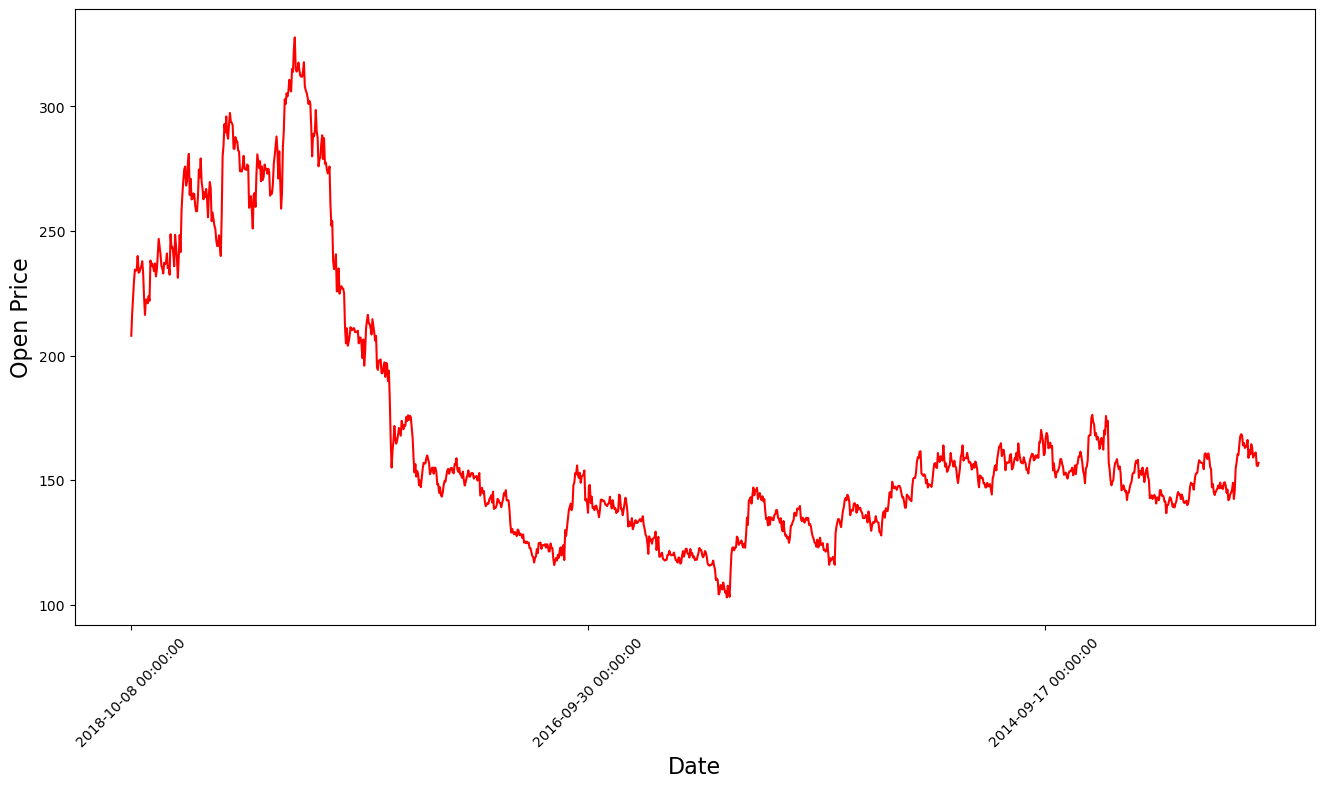

In [23]:
data['Date'] = pd.to_datetime(data['Date'])

plt.figure(figsize=(16, 8))
plt.plot(range(data.shape[0]), data['Open'], color='red')  # Change the color to red
plt.xticks(range(0, data.shape[0], 500), data['Date'].loc[::500], rotation=45)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Open Price', fontsize=16)
plt.show()


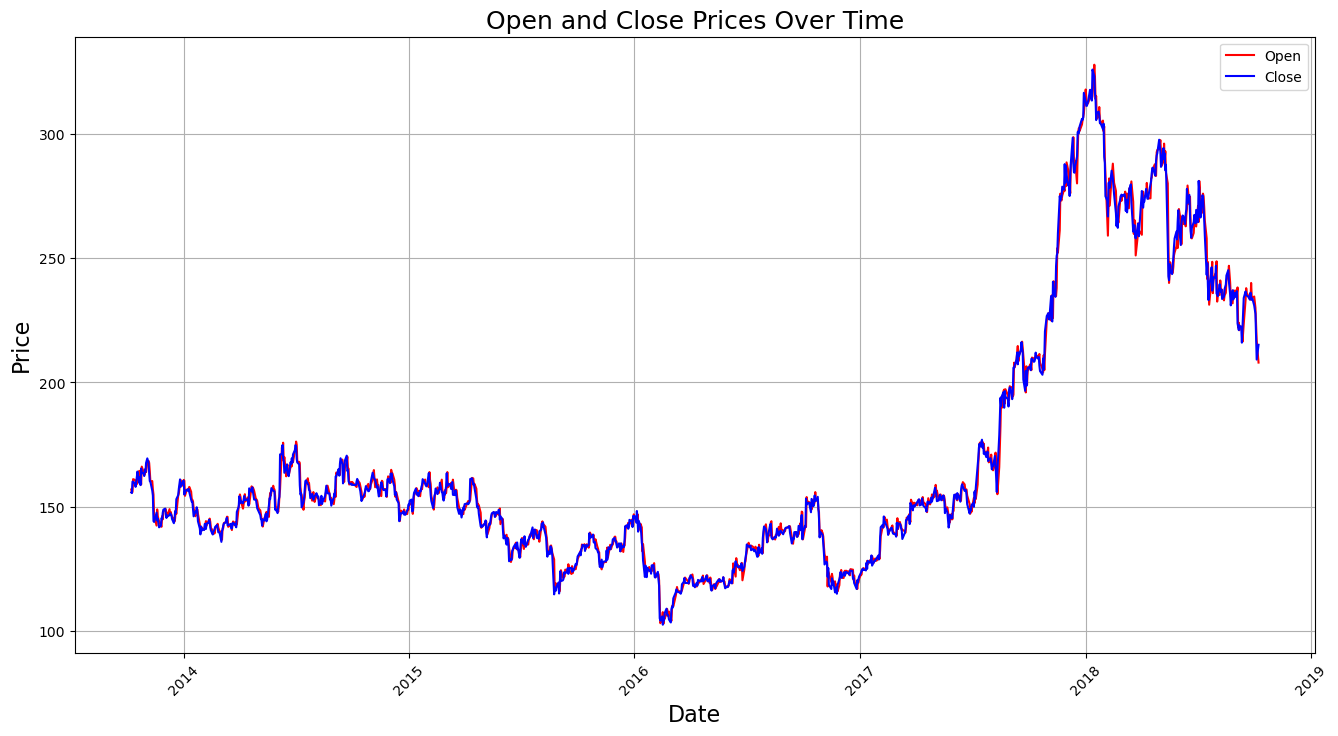

In [22]:
data['Date'] = pd.to_datetime(data['Date'])

plt.figure(figsize=(16, 8))

plt.plot(data['Date'], data['Open'], label='Open', color='red')

plt.plot(data['Date'], data['Close'], label='Close', color='blue')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.title('Open and Close Prices Over Time', fontsize=18)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()


In [38]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
len(training_set_scaled)
X_train = []
y_train = []
for i in range(10,930):
    X_train.append(training_set_scaled[i-10:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [50]:
!pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/fe/58/34d4d8f1aa11120c2d36d7ad27d0526164b1a8ae45990a2fede31d0e59bf/keras-2.14.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 660.6 kB/s eta 0:00:03
    --------------------------------------- 0.0/1.7 MB 660.6 kB/s eta 0:00:03
    --------------------------------------- 0.0/1.7 MB 330.3 kB/s eta 0:00:06
   - -------------------------------------- 0.1/1.7 MB 328.2 kB/s eta 0:00:06
   - -------------------------------------- 0.1/1.7 MB 328.8 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.7 MB 291.5 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.7 MB 298.5 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.7 MB 277.4 kB/s eta 0:00:06
   --- ------------------------------------ 0.1/1.7 MB 275.0 kB/s eta 0:00:06
   --- --------------------------

# LSTM MODEL

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 75, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 75))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 200, batch_size = 64)

Epoch 1/200
15/15 [==============================] - 19s 62ms/step - loss: 0.0733
Epoch 2/200
15/15 [==============================] - 1s 55ms/step - loss: 0.0114
Epoch 3/200
15/15 [==============================] - 1s 55ms/step - loss: 0.0046
Epoch 4/200
15/15 [==============================] - 1s 55ms/step - loss: 0.0034
Epoch 5/200
15/15 [==============================] - 1s 60ms/step - loss: 0.0038
Epoch 6/200
15/15 [==============================] - 1s 59ms/step - loss: 0.0043
Epoch 7/200
15/15 [==============================] - 1s 59ms/step - loss: 0.0032
Epoch 8/200
15/15 [==============================] - 1s 60ms/step - loss: 0.0032
Epoch 9/200
15/15 [==============================] - 1s 60ms/step - loss: 0.0031
Epoch 10/200
15/15 [==============================] - 1s 60ms/step - loss: 0.0034
Epoch 11/200
15/15 [==============================] - 1s 58ms/step - loss: 0.0034
Epoch 12/200
15/15 [==============================] - 1s 58ms/step - loss: 0.0032
Epoch 13/200
15/15 [====

In [67]:
real_stock_price = testing_set
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10,305):
    X_test.append(inputs[i-10:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

10/10 [==============================] - 0s 14ms/step


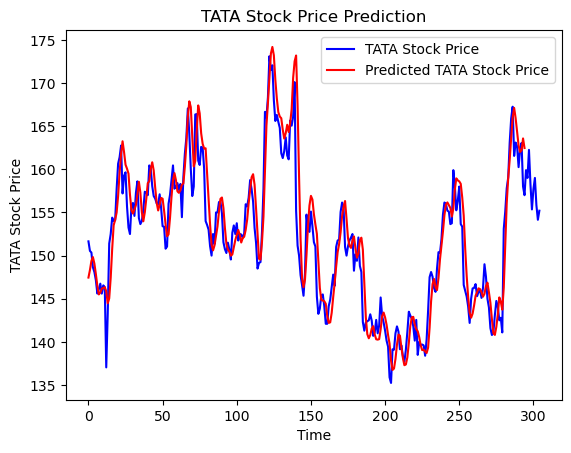

In [68]:
plt.plot(real_stock_price, color = 'blue', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()
